# Amazon Top 50 Bestselling Books 2009-2019

https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

* 분석 방향
    - 연도별, 작가별 특징
    - 연도별, 장르별 특징
    - 작가별, 리뷰수별 특징

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#연도별,-장르별" data-toc-modified-id="연도별,-장르별-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>연도별, 장르별</a></span></li><li><span><a href="#연도별,-작가별" data-toc-modified-id="연도별,-작가별-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>연도별, 작가별</a></span></li><li><span><a href="#작가들의-작품-확인" data-toc-modified-id="작가들의-작품-확인-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>작가들의 작품 확인</a></span></li><li><span><a href="#작가별,-리뷰수별" data-toc-modified-id="작가별,-리뷰수별-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>작가별, 리뷰수별</a></span></li><li><span><a href="#전체-데이터에서의-리뷰수와-베스트셀러에-등재된-작가의-리뷰수" data-toc-modified-id="전체-데이터에서의-리뷰수와-베스트셀러에-등재된-작가의-리뷰수-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>전체 데이터에서의 리뷰수와 베스트셀러에 등재된 작가의 리뷰수</a></span></li><li><span><a href="#2014년-Fiction과-Non-Fiction으로-분류해-비교" data-toc-modified-id="2014년-Fiction과-Non-Fiction으로-분류해-비교-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>2014년 Fiction과 Non Fiction으로 분류해 비교</a></span></li><li><span><a href="#가격" data-toc-modified-id="가격-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>가격</a></span></li></ul></li><li><span><a href="#책-제목으로-작가-예측" data-toc-modified-id="책-제목으로-작가-예측-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>책 제목으로 작가 예측</a></span><ul class="toc-item"><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>데이터 전처리</a></span></li><li><span><a href="#전제-제목에-대한-워드클라우드---어떤-단어를-가장-많이-사용하는지?" data-toc-modified-id="전제-제목에-대한-워드클라우드---어떤-단어를-가장-많이-사용하는지?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>전제 제목에 대한 워드클라우드 - 어떤 단어를 가장 많이 사용하는지?</a></span><ul class="toc-item"><li><span><a href="#데이터-정의" data-toc-modified-id="데이터-정의-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>데이터 정의</a></span></li><li><span><a href="#워드클라우드-그리기" data-toc-modified-id="워드클라우드-그리기-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>워드클라우드 그리기</a></span></li></ul></li><li><span><a href="#작가별-제목의-워드클라우드" data-toc-modified-id="작가별-제목의-워드클라우드-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>작가별 제목의 워드클라우드</a></span><ul class="toc-item"><li><span><a href="#데이터-추출" data-toc-modified-id="데이터-추출-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>데이터 추출</a></span></li><li><span><a href="#작가-:-Jeff-Kinney" data-toc-modified-id="작가-:-Jeff-Kinney-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>작가 : Jeff Kinney</a></span></li><li><span><a href="#작가-:-Gary-Champman" data-toc-modified-id="작가-:-Gary-Champman-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>작가 : Gary Champman</a></span></li><li><span><a href="#작가--:-Suzanne-Collins" data-toc-modified-id="작가--:-Suzanne-Collins-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>작가  : Suzanne Collins</a></span></li><li><span><a href="#작가-:-Rick-Riordan" data-toc-modified-id="작가-:-Rick-Riordan-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>작가 : Rick Riordan</a></span></li></ul></li><li><span><a href="#Author--예측" data-toc-modified-id="Author--예측-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Author  예측</a></span><ul class="toc-item"><li><span><a href="#데이터-분할" data-toc-modified-id="데이터-분할-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>데이터 분할</a></span></li><li><span><a href="#토크나이저-함수-정의" data-toc-modified-id="토크나이저-함수-정의-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>토크나이저 함수 정의</a></span></li><li><span><a href="#CountVector-기반-특성-추출" data-toc-modified-id="CountVector-기반-특성-추출-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>CountVector 기반 특성 추출</a></span></li><li><span><a href="#TfidfVector-기반-특성-추출" data-toc-modified-id="TfidfVector-기반-특성-추출-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>TfidfVector 기반 특성 추출</a></span></li></ul></li><li><span><a href="#최종-결과-비교" data-toc-modified-id="최종-결과-비교-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>최종 결과 비교</a></span><ul class="toc-item"><li><span><a href="#CountVector-기반" data-toc-modified-id="CountVector-기반-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>CountVector 기반</a></span></li><li><span><a href="#TfidfVector-기반" data-toc-modified-id="TfidfVector-기반-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>TfidfVector 기반</a></span></li></ul></li></ul></li><li><span><a href="#책-제목으로-장르-예측" data-toc-modified-id="책-제목으로-장르-예측-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>책 제목으로 장르 예측</a></span><ul class="toc-item"><li><span><a href="#릿지-회귀-이용" data-toc-modified-id="릿지-회귀-이용-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>릿지 회귀 이용</a></span><ul class="toc-item"><li><span><a href="#CountVector" data-toc-modified-id="CountVector-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>CountVector</a></span></li><li><span><a href="#TfidfVector" data-toc-modified-id="TfidfVector-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>TfidfVector</a></span></li></ul></li><li><span><a href="#딥러닝-이용" data-toc-modified-id="딥러닝-이용-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>딥러닝 이용</a></span><ul class="toc-item"><li><span><a href="#매개변수-결정" data-toc-modified-id="매개변수-결정-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>매개변수 결정</a></span></li><li><span><a href="#데이터-정의" data-toc-modified-id="데이터-정의-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>데이터 정의</a></span></li><li><span><a href="#Word-Embedding" data-toc-modified-id="Word-Embedding-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Word Embedding</a></span></li><li><span><a href="#데이터-분할" data-toc-modified-id="데이터-분할-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>데이터 분할</a></span></li><li><span><a href="#CNN-모델-정의" data-toc-modified-id="CNN-모델-정의-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>CNN 모델 정의</a></span></li><li><span><a href="#모델-학습" data-toc-modified-id="모델-학습-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>모델 학습</a></span></li><li><span><a href="#모델-학습-결과" data-toc-modified-id="모델-학습-결과-4.2.7"><span class="toc-item-num">4.2.7&nbsp;&nbsp;</span>모델 학습 결과</a></span></li><li><span><a href="#Test-set-분류-결과" data-toc-modified-id="Test-set-분류-결과-4.2.8"><span class="toc-item-num">4.2.8&nbsp;&nbsp;</span>Test set 분류 결과</a></span></li></ul></li></ul></li></ul></div>

## 데이터 불러오기

In [2]:
import pandas as pd

df = pd.read_csv('bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


* Name : 책의 이름
* Author : 책의 저자
* User Rating : 아마존 사용자 평가
* Reviews : 아마존에 작성된 리뷰 수
* Price : 책 가격
* Year : 베스트셀러에 선정된 연도
* Genre : 장르

In [3]:
df.info() # null 값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


## EDA

In [5]:
# 작가 수
print(len(df['Author'].unique()))

248


In [6]:
df.groupby('Author').count()

,Name,User Rating,Reviews,Price,Year,Genre
Author,,,,,,
Abraham Verghese,2,2,2,2,2,2
Adam Gasiewski,1,1,1,1,1,1
Adam Mansbach,1,1,1,1,1,1
Adir Levy,1,1,1,1,1,1
Admiral William H. McRaven,1,1,1,1,1,1
...,...,...,...,...,...,...
Walter Isaacson,3,3,3,3,3,3
William Davis,2,2,2,2,2,2
William P. Young,2,2,2,2,2,2


### 연도별, 장르별

In [8]:
import matplotlib.pyplot as plt

df['Genre'].value_counts().plot.pie(autopct="%.1f%%")
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

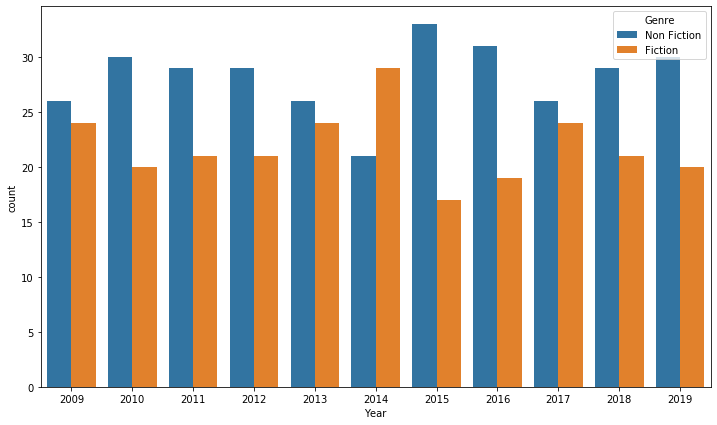

In [9]:
import seaborn as sns

plt.figure(figsize=(12,7))
sns.countplot(df['Year'],hue=df['Genre'])
plt.show()

### 연도별, 작가별

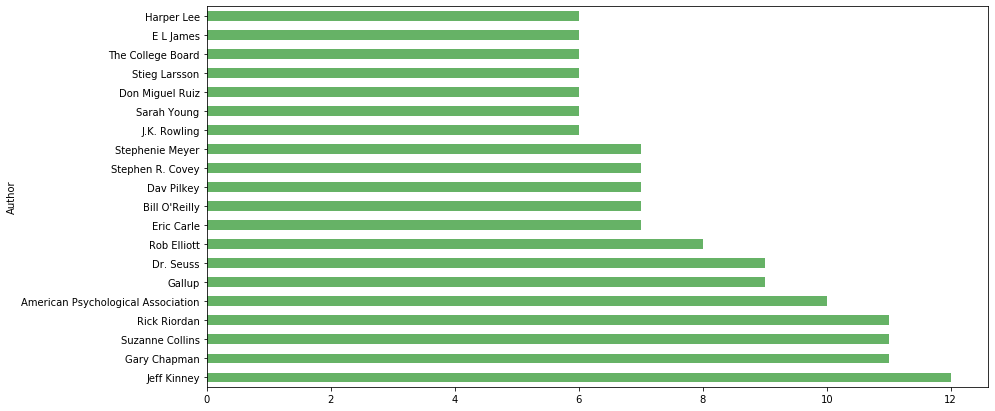

In [10]:
df.groupby('Author').count().sort_values(by='Name', ascending=False)['Name'].head(20).plot(kind='barh',
                                                                                            figsize=(14, 7),
                                                                                            color='green',
                                                                                            alpha=0.6)

### 작가들의 작품 확인

In [10]:
df[['Year', 'Author', 'Name']].loc[df['Author']=='Jeff Kinney']

,Year,Author,Name
42,2011,Jeff Kinney,"Cabin Fever (Diary of a Wimpy Kid, Book 6)"
71,2013,Jeff Kinney,"Diary of a Wimpy Kid: Hard Luck, Book 8"
72,2009,Jeff Kinney,Diary of a Wimpy Kid: The Last Straw (Book 3)
73,2014,Jeff Kinney,Diary of a Wimpy Kid: The Long Haul
80,2009,Jeff Kinney,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum..."
88,2016,Jeff Kinney,Double Down (Diary of a Wimpy Kid #11)
253,2015,Jeff Kinney,Old School (Diary of a Wimpy Kid #10)
381,2017,Jeff Kinney,The Getaway
435,2018,Jeff Kinney,The Meltdown (Diary of a Wimpy Kid Book 13)
468,2012,Jeff Kinney,"The Third Wheel (Diary of a Wimpy Kid, Book 7)"


In [11]:
df[['Year', 'Author', 'Name']].loc[df['Author']=='Gary Chapman']

,Year,Author,Name
320,2010,Gary Chapman,The 5 Love Languages: The Secret to Love That ...
321,2011,Gary Chapman,The 5 Love Languages: The Secret to Love That ...
322,2012,Gary Chapman,The 5 Love Languages: The Secret to Love That ...
323,2013,Gary Chapman,The 5 Love Languages: The Secret to Love That ...
324,2014,Gary Chapman,The 5 Love Languages: The Secret to Love That ...
325,2015,Gary Chapman,The 5 Love Languages: The Secret to Love that ...
326,2016,Gary Chapman,The 5 Love Languages: The Secret to Love that ...
327,2017,Gary Chapman,The 5 Love Languages: The Secret to Love that ...
328,2018,Gary Chapman,The 5 Love Languages: The Secret to Love that ...
329,2019,Gary Chapman,The 5 Love Languages: The Secret to Love that ...


In [12]:
df[['Year', 'Author', 'Name']].loc[df['Author']=='Suzanne Collins']

,Year,Author,Name
46,2010,Suzanne Collins,Catching Fire (The Hunger Games)
47,2011,Suzanne Collins,Catching Fire (The Hunger Games)
48,2012,Suzanne Collins,Catching Fire (The Hunger Games)
236,2010,Suzanne Collins,Mockingjay (The Hunger Games)
237,2011,Suzanne Collins,Mockingjay (The Hunger Games)
238,2012,Suzanne Collins,Mockingjay (The Hunger Games)
407,2010,Suzanne Collins,The Hunger Games
408,2011,Suzanne Collins,The Hunger Games (Book 1)
409,2012,Suzanne Collins,The Hunger Games (Book 1)
410,2011,Suzanne Collins,The Hunger Games Trilogy Boxed Set (1)


In [13]:
df[['Year', 'Author', 'Name']].loc[df['Author']=='Rick Riordan']

,Year,Author,Name
264,2010,Rick Riordan,Percy Jackson and the Olympians Paperback Boxe...
343,2014,Rick Riordan,The Blood of Olympus (The Heroes of Olympus (5))
406,2013,Rick Riordan,"The House of Hades (Heroes of Olympus, Book 4)"
418,2009,Rick Riordan,The Last Olympian (Percy Jackson and the Olymp...
419,2010,Rick Riordan,The Last Olympian (Percy Jackson and the Olymp...
428,2010,Rick Riordan,"The Lost Hero (Heroes of Olympus, Book 1)"
432,2012,Rick Riordan,"The Mark of Athena (Heroes of Olympus, Book 3)"
456,2010,Rick Riordan,"The Red Pyramid (The Kane Chronicles, Book 1)"
458,2012,Rick Riordan,"The Serpent's Shadow (The Kane Chronicles, Boo..."
463,2011,Rick Riordan,"The Son of Neptune (Heroes of Olympus, Book 2)"


### 작가별, 리뷰수별

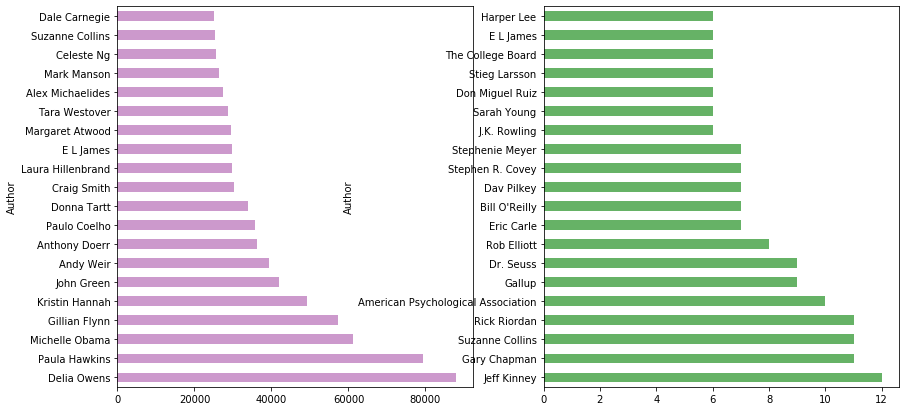

In [11]:
plt.figure(figsize=(17, 10))

# 리뷰수가 많은 작가들
plt.subplot(121)
df.groupby('Author').mean()['Reviews'].sort_values(ascending=False).head(20).plot(kind='barh', color='purple', alpha=0.4, figsize=(14, 7))

# 베스트셀러에 자주 올라오는 작가들
plt.subplot(122)
df.groupby('Author').count().sort_values(by='Name', ascending=False)['Name'].head(20).plot(kind='barh', figsize=(14, 7), color='green', alpha=0.6)

plt.show()

공통된 작가도 있지만 아닌 경우가 대부분.

### 전체 데이터에서의 리뷰수와 베스트셀러에 등재된 작가의 리뷰수

In [41]:
top_list = df.groupby('Author').count().sort_values(by='Name', ascending=False)['Name'].head(20).index
t_list=['Jeff Kinney', 'Gary Chapman', 'Suzanne Collins', 'Rick Riordan',
       'American Psychological Association', 'Gallup', 'Dr. Seuss',
       'Rob Elliott', 'Eric Carle',  'Dav Pilkey',
       'Stephen R. Covey', 'Stephenie Meyer', 'J.K. Rowling', 'Sarah Young',
       'Don Miguel Ruiz', 'Stieg Larsson', 'The College Board', 'E L James',
       'Harper Lee']
t_list = pd.DataFrame(t_list)
t_list.columns=['Author']
top_list = pd.merge(t_list, df, on='Author', how='left')

non_top_list = df.groupby('Author').count().sort_values(by='Name', ascending=False)['Name'].tail(228).index
non_list = [row for row in df['Author'] if row not in t_list]
non_list = pd.DataFrame(non_list, columns=['Author'])
non_top_list = pd.merge(non_list, df, on='Author', how='left')

In [33]:
non_top_list = df.groupby('Author').count().sort_values(by='Name', ascending=False)['Name'].tail(10).index
non_top_list

Index(['Todd Burpo', 'Tony Hsieh', 'Tucker Carlson', 'Veronica Roth',
       'W. Cleon Skousen', 'Walter Isaacson', 'William Davis',
       'William P. Young', 'Wizards RPG Team', 'Zhi Gang Sha'],
      dtype='object', name='Author')

평점 차이

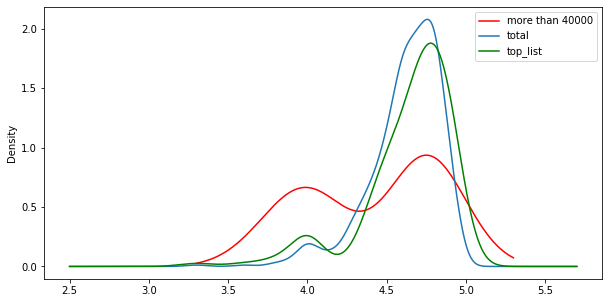

In [15]:
plt.figure(figsize=(10, 5))

df[df['Reviews']>40000]['User Rating'].plot(kind='kde', label='more than 40000', color='red')
df['User Rating'].plot(kind='kde', label='total')
top_list['User Rating'].plot(kind='kde', label='top_list', color='green')
plt.legend()
plt.show()

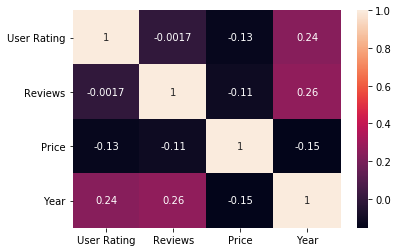

In [16]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

### 2014년 Fiction과 Non Fiction으로 분류해 비교

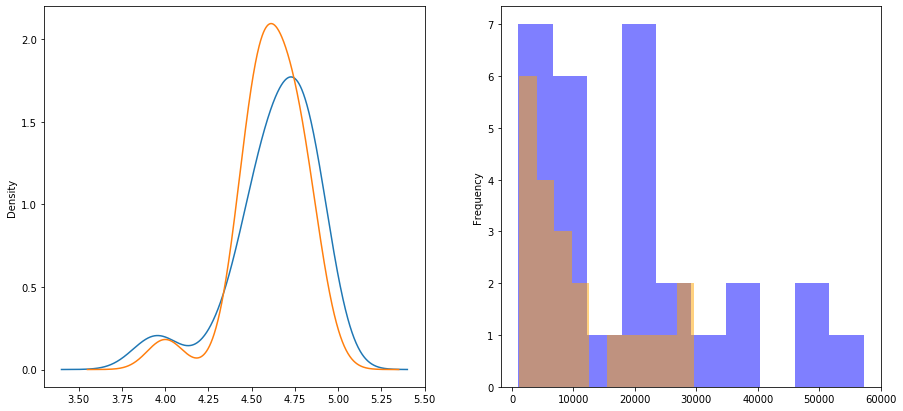

In [17]:
year_2014 = df[['Year', 'User Rating', 'Genre', 'Reviews']].loc[df['Year']==2014]

plt.figure(figsize=(15, 7))

plt.subplot(121)
year_2014[year_2014['Genre']=='Fiction']['User Rating'].plot(kind='kde', label='fiction')
year_2014[year_2014['Genre']=='Non Fiction']['User Rating'].plot(kind='kde', label='non fiction')

plt.subplot(122)
year_2014[year_2014['Genre']=='Fiction']['Reviews'].plot(kind='hist', label='fiction', color='blue', alpha=0.5)
year_2014[year_2014['Genre']=='Non Fiction']['Reviews'].plot(kind='hist', label='non fiction', color='orange', alpha=0.5)

Fiction의 별점과 리뷰수가 더 많다.

Text(0.5, 1.0, 'Fiction & Non-Fiction rating')

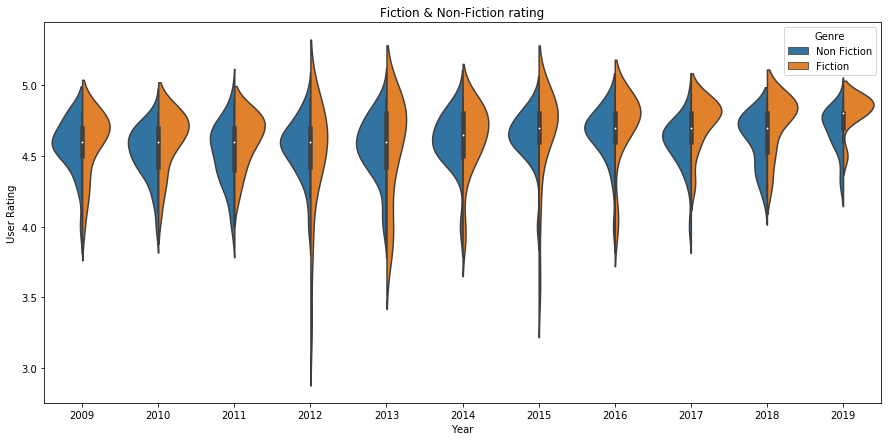

In [18]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='Year', y='User Rating', data=df, hue='Genre', split=True)
plt.title('Fiction & Non-Fiction rating')

전반적으로 전체 년도에 걸쳐 픽션의 평점이 다소 높음.

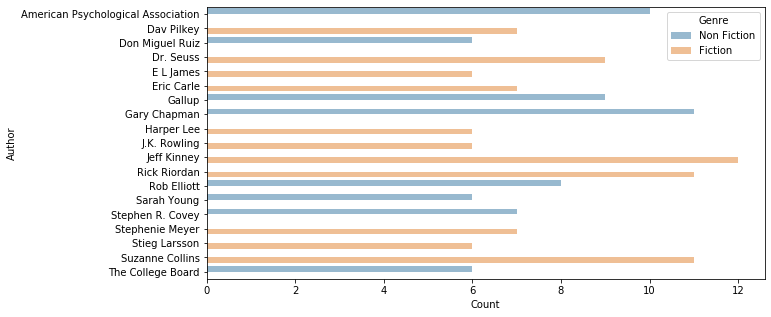

In [92]:
top_list_df = pd.DataFrame(top_list.groupby(['Author']).count()['Name'])
top_list_df.rename(columns={'Name' : 'Count'}, inplace=True)
df_2 = df[['Author', 'Name', 'Genre']]
top_list_df = pd.merge(top_list_df, df_2, on='Author', how='left')
top_list_df

plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Author', data=top_list_df, hue='Genre', alpha=0.5)

베스트셀러에 6회 이상 선정된 작가들의 작품만 추려보면 Non Fiction보다 Fiction의 수가 더 많이 나타남.

Text(0.5, 1.0, 'Non Top Author')

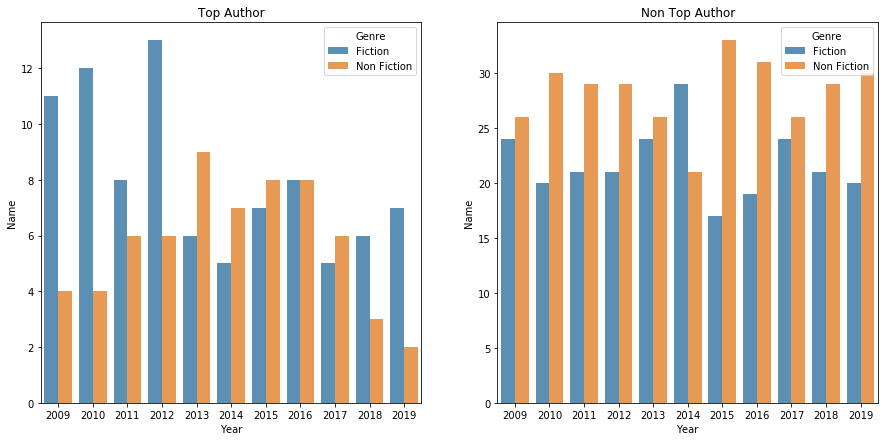

In [172]:
plt.figure(figsize=(15, 7))

# 6회 이상 베스트셀러에 선정된 작가들
plt.subplot(121)
sns.barplot(x='Year', y='Name', data=pd.DataFrame(top_list.groupby(['Genre', 'Year']).count()).reset_index(), hue='Genre', alpha=0.8)
plt.title('Top Author')

# 6회 미만 베스트셀러에 선정된 작가들
plt.subplot(122)
sns.barplot(x='Year', y='Name', data=pd.DataFrame(df.groupby(['Genre', 'Year']).count().tail(228)).reset_index(), hue='Genre', alpha=0.8)
plt.title('Non Top Author')

top 작가들은 fiction 우세, top 작가가 아닌 작가들은 non fiction이 우세

결과)

인기있는 작가들의 작품은 Fiction이 많고 이 작품들에 대해서는 리뷰와 별점이 높지만 몇몇 작가들의 작품을 제외한 나머지는 Non Fiction이 많다.

2014년은 유명 작가들의 Fiction수가 적음에도 불구하고 그 외에 Fiction 작품 수가 많았기 때문에 2014년에서 Fiction이 Non Fiction보다 우세했다고 판단.

### 가격

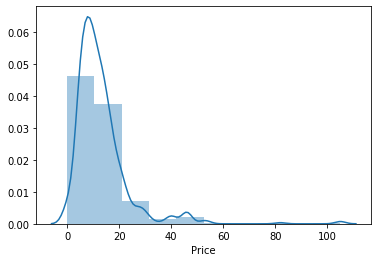

In [100]:
sns.distplot(df['Price'], bins=10)

## 책 제목으로 작가 예측

### 데이터 전처리

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import re

In [4]:
tokenizer = RegexpTokenizer("[\w']{2,}")
english_stops = set(stopwords.words("english"))

In [5]:
def tokenize_result(doc):
    reg_tokens = tokenizer.tokenize(doc.lower())
    result = [word for word in reg_tokens if word not in english_stops and word != "'the"]
    return result

def dic_result(text):
    word_count = dict()
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1
    return word_count

### 전제 제목에 대한 워드클라우드 - 어떤 단어를 가장 많이 사용하는지?
#### 데이터 정의

In [6]:
import pandas as pd
import numpy as np

df_name = str(np.array(df['Name'].tolist()))

#### 워드클라우드 그리기

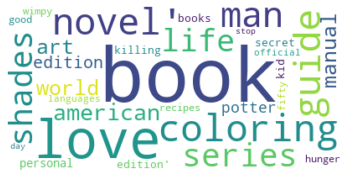

In [106]:
result = tokenize_result(df_name)
count = dic_result(result)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white',
                      max_words=30).generate_from_frequencies(count)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### 작가별 제목의 워드클라우드

#### 데이터 추출

In [107]:
JK = df[['Name']].loc[df['Author']=='Jeff Kinney']
GC = df[['Name']].loc[df['Author']=='Gary Chapman']
SC = df[['Name']].loc[df['Author']=='Suzanne Collins']
RR = df[['Name']].loc[df['Author']=='Rick Riordan']

In [108]:
df_JK = str(np.array(JK['Name'].tolist()))
df_GC = str(np.array(GC['Name'].tolist()))
df_SC = str(np.array(SC['Name'].tolist()))
df_RR = str(np.array(RR['Name'].tolist()))

#### 작가 : Jeff Kinney

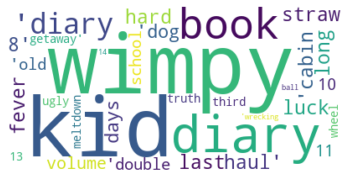

In [109]:
result_JK = tokenize_result(df_JK)
count_JK = dic_result(result_JK)

wordcloud = WordCloud(background_color="white").generate_from_frequencies(count_JK)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

#### 작가 : Gary Champman

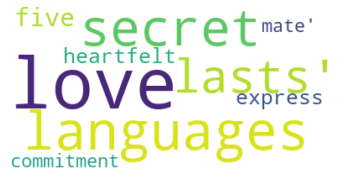

In [110]:
result_GC = tokenize_result(df_GC)
count_GC = dic_result(result_GC)

wordcloud = WordCloud(background_color="white").generate_from_frequencies(count_GC)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

#### 작가  : Suzanne Collins

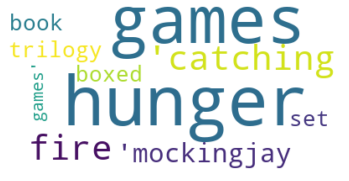

In [111]:
result_SC = tokenize_result(df_SC)
count_SC = dic_result(result_SC)

wordcloud = WordCloud(background_color="white").generate_from_frequencies(count_SC)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

#### 작가 : Rick Riordan

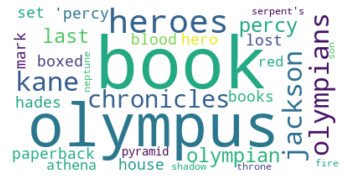

In [112]:
result_RR = tokenize_result(df_RR)
count_RR = dic_result(result_RR)

wordcloud = WordCloud(background_color="white").generate_from_frequencies(count_RR)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

### Author  예측

#### 데이터 분할

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.Name, df.Author, test_size=0.2, random_state=1)

print('# Train set size : ', len(x_train))
print('# Test set size : ', len(x_test))

# Train set size :  440
# Test set size :  110


#### 토크나이저 함수 정의

In [114]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import re

In [8]:
RegTok = RegexpTokenizer("[\w']{2,}") 

stop_words = set(stopwords.words('english')) 

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    words = [word for word in tokens if (word not in stop_words) 
             and len(word) > 2] 
    features = (list(map(lambda token:PorterStemmer().stem(token), words)))
    return features

#### CountVector 기반 특성 추출

CountVectorizer 정의

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=tokenizer).fit(x_train)

x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

나이브 베이즈 분류기 적용

In [117]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(x_train_cv, y_train)

print('Train set score : {:.3f}'.format(nb.score(x_train_cv, y_train)))
print('Test set score : {:.3f}'.format(nb.score(x_test_cv, y_test)))

Train set score : 0.816
Test set score : 0.500


릿지 회귀 적용

In [118]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()

ridge.fit(x_train_cv, y_train)

print('Train set score : {:.3f}'.format(ridge.score(x_train_cv, y_train)))
print('Test set score : {:.3f}'.format(ridge.score(x_test_cv, y_test)))

Train set score : 1.000
Test set score : 0.636


로지스틱 회귀 적용

In [119]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(x_train_cv, y_train)

print('Train set score : {:.3f}'.format(logistic.score(x_train_cv, y_train)))
print('Test set score : {:.3f}'.format(logistic.score(x_test_cv, y_test)))

Train set score : 0.991
Test set score : 0.609


라쏘 회귀 적용

In [120]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1)

lasso.fit(x_train_cv, y_train)

print('Train set score : {:.3f}'.format(lasso.score(x_train_cv, y_train)))
print('Test set score : {:.3f}'.format(lasso.score(x_test_cv, y_test)))

Train set score : 0.709
Test set score : 0.482


**예측 결과**

In [121]:
xy_cv = pd.concat([x_test, y_test], axis=1)
xy_cv = xy_cv.reset_index(drop=True)

pred_cv = pd.DataFrame(ridge.predict(x_test_cv), columns=['Prediction'])

result_cv = pd.concat([xy_cv, pred_cv], axis=1)
result_cv

,Name,Author,Prediction
0,Have a Little Faith: A True Story,Mitch Albom,Edward M. Kennedy
1,StrengthsFinder 2.0,Gallup,Gallup
2,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,Rod Campbell
3,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,Marie Kondō
4,Gone Girl,Gillian Flynn,Gillian Flynn
...,...,...,...
105,"The Lost Hero (Heroes of Olympus, Book 1)",Rick Riordan,Rick Riordan
106,The Hunger Games (Book 1),Suzanne Collins,Suzanne Collins
107,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,Blue Star Coloring
108,"Oh, the Places You'll Go!",Dr. Seuss,Dr. Seuss


#### TfidfVector 기반 특성 추출


TfidfVectorizer 정의

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=tokenizer).fit(x_train)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

나이브 베이즈 분류기 적용

In [123]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(x_train_tfidf, y_train)

print('Train set score : {:.3f}'.format(nb.score(x_train_tfidf, y_train)))
print('Test set score : {:.3f}'.format(nb.score(x_test_tfidf, y_test)))

Train set score : 0.480
Test set score : 0.345


릿지 회귀 적용

In [124]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()

ridge.fit(x_train_tfidf, y_train)

print('Train set score : {:.3f}'.format(ridge.score(x_train_tfidf, y_train)))
print('Test set score : {:.3f}'.format(ridge.score(x_test_tfidf, y_test)))

Train set score : 0.993
Test set score : 0.618


로지스틱 회귀 적용

In [125]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(x_train_tfidf, y_train)

print('Train set score : {:.3f}'.format(logistic.score(x_train_tfidf, y_train)))
print('Test set score : {:.3f}'.format(logistic.score(x_test_tfidf, y_test)))

Train set score : 0.911
Test set score : 0.527


라쏘 회귀 적용

In [126]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1)

lasso.fit(x_train_tfidf, y_train)

print('Train set score : {:.3f}'.format(lasso.score(x_train_tfidf, y_train)))
print('Test set score : {:.3f}'.format(lasso.score(x_test_tfidf, y_test)))

Train set score : 0.545
Test set score : 0.373


In [ ]:
nb = MultinomialNB()

nb.fit(x_train_tfidf, y_train)

print('Train set score : {:.3f}'.format(nb.score(x_train_cv, y_train)))
print('Test set score : {:.3f}'.format(nb.score(x_test_cv, y_test)))

**예측 결과**

In [127]:
xy_tfidf = pd.concat([x_test, y_test], axis=1)
xy_tfidf = xy_tfidf.reset_index(drop=True)

pred_tfidf = pd.DataFrame(ridge.predict(x_test_tfidf), columns=['Prediction'])

result_tfidf = pd.concat([xy_tfidf, pred_tfidf], axis=1)
result_tfidf

,Name,Author,Prediction
0,Have a Little Faith: A True Story,Mitch Albom,David Platt
1,StrengthsFinder 2.0,Gallup,Gallup
2,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,Rod Campbell
3,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,Marie Kondō
4,Gone Girl,Gillian Flynn,Gillian Flynn
...,...,...,...
105,"The Lost Hero (Heroes of Olympus, Book 1)",Rick Riordan,Rick Riordan
106,The Hunger Games (Book 1),Suzanne Collins,Suzanne Collins
107,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,Blue Star Coloring
108,"Oh, the Places You'll Go!",Dr. Seuss,Dr. Seuss


### 최종 결과 비교

#### CountVector 기반

In [128]:
result_cv[:20] # 정확도 0.636

,Name,Author,Prediction
0,Have a Little Faith: A True Story,Mitch Albom,Edward M. Kennedy
1,StrengthsFinder 2.0,Gallup,Gallup
2,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,Rod Campbell
3,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,Marie Kondō
4,Gone Girl,Gillian Flynn,Gillian Flynn
5,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,Elizabeth Strout
6,StrengthsFinder 2.0,Gallup,Gallup
7,Secret Garden: An Inky Treasure Hunt and Color...,Johanna Basford,Marjorie Sarnat
8,Proof of Heaven: A Neurosurgeon's Journey into...,Eben Alexander,Eben Alexander
9,The Elegance of the Hedgehog,Muriel Barbery,John Grisham


#### TfidfVector 기반

In [129]:
result_tfidf[:20] # 정확도 0.618

,Name,Author,Prediction
0,Have a Little Faith: A True Story,Mitch Albom,David Platt
1,StrengthsFinder 2.0,Gallup,Gallup
2,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,Rod Campbell
3,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,Marie Kondō
4,Gone Girl,Gillian Flynn,Gillian Flynn
5,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,Elizabeth Strout
6,StrengthsFinder 2.0,Gallup,Gallup
7,Secret Garden: An Inky Treasure Hunt and Color...,Johanna Basford,Marjorie Sarnat
8,Proof of Heaven: A Neurosurgeon's Journey into...,Eben Alexander,Eben Alexander
9,The Elegance of the Hedgehog,Muriel Barbery,Rick Riordan


## 책 제목으로 장르 예측

In [182]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['Name'], df['Genre'], test_size=0.2, random_state=1)

### 릿지 회귀 이용

#### CountVector

In [131]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=tokenizer).fit(x_train)

x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [184]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()

ridge.fit(x_train_cv, y_train)

print('Train set score : {:.3f}'.format(ridge.score(x_train_cv, y_train)))
print('Test set score : {:.3f}'.format(ridge.score(x_test_cv, y_test)))

Train set score : 1.000
Test set score : 0.900


In [133]:
import pandas as pd

xy_cv = pd.concat([x_test, y_test], axis=1)
xy_cv = xy_cv.reset_index(drop=True)

pred_cv = pd.DataFrame(ridge.predict(x_test_cv), columns=['Prediction'])

genre_cv = pd.concat([xy_cv, pred_cv], axis=1)
genre_cv[:20]

,Name,Genre,Prediction
0,Have a Little Faith: A True Story,Non Fiction,Non Fiction
1,StrengthsFinder 2.0,Non Fiction,Non Fiction
2,Dear Zoo: A Lift-the-Flap Book,Fiction,Fiction
3,The Life-Changing Magic of Tidying Up: The Jap...,Non Fiction,Non Fiction
4,Gone Girl,Fiction,Fiction
5,Last Week Tonight with John Oliver Presents A ...,Fiction,Fiction
6,StrengthsFinder 2.0,Non Fiction,Non Fiction
7,Secret Garden: An Inky Treasure Hunt and Color...,Non Fiction,Non Fiction
8,Proof of Heaven: A Neurosurgeon's Journey into...,Non Fiction,Non Fiction
9,The Elegance of the Hedgehog,Fiction,Fiction


#### TfidfVector

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=tokenizer).fit(x_train)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [190]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()

ridge.fit(x_train_tfidf, y_train)

print('Train set score : {:.3f}'.format(ridge.score(x_train_tfidf, y_train)))
print('Test set score : {:.3f}'.format(ridge.score(x_test_tfidf, y_test)))

Train set score : 0.998
Test set score : 0.909


In [136]:
xy_tfidf = pd.concat([x_test, y_test], axis=1)
xy_tfidf = xy_tfidf.reset_index(drop=True)

pred_tfidf = pd.DataFrame(ridge.predict(x_test_tfidf), columns=['Prediction'])

genre_tfidf = pd.concat([xy_tfidf, pred_tfidf], axis=1)
genre_tfidf[:20]

,Name,Genre,Prediction
0,Have a Little Faith: A True Story,Non Fiction,Non Fiction
1,StrengthsFinder 2.0,Non Fiction,Non Fiction
2,Dear Zoo: A Lift-the-Flap Book,Fiction,Fiction
3,The Life-Changing Magic of Tidying Up: The Jap...,Non Fiction,Non Fiction
4,Gone Girl,Fiction,Fiction
5,Last Week Tonight with John Oliver Presents A ...,Fiction,Fiction
6,StrengthsFinder 2.0,Non Fiction,Non Fiction
7,Secret Garden: An Inky Treasure Hunt and Color...,Non Fiction,Non Fiction
8,Proof of Heaven: A Neurosurgeon's Journey into...,Non Fiction,Non Fiction
9,The Elegance of the Hedgehog,Fiction,Non Fiction


### 딥러닝 이용

#### 매개변수 결정

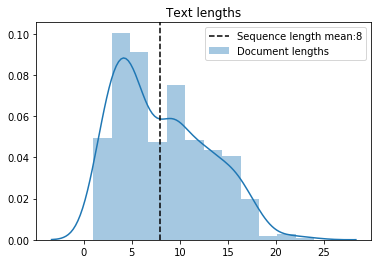

가장 긴 문장 :  24 개의 단어
가장 짧은 문장 :  1 개의 단어


In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df['len'] = df.Name.apply(lambda words:len(words.split()))

mean_seq_len = np.round(df.len.mean()).astype(int)
sns.distplot(tuple(df.len), hist=True, kde=True, label='Document lengths')
plt.axvline(x=mean_seq_len, color='k', linestyle='--', label=f'Sequence length mean:{mean_seq_len}')
plt.title('Text lengths')
plt.legend()
plt.show()

print('가장 긴 문장 : ', df['len'].max(), '개의 단어')
print('가장 짧은 문장 : ', df['len'].min(), '개의 단어')

#### 데이터 정의

In [23]:
title = df['Name'].tolist()
genre = df['Genre'].tolist()

print(len(title))
print(len(title[0]))
print(set(genre))

550
29
{'Fiction', 'Non Fiction'}


In [27]:
import numpy as np

label_dict = {'Fiction' : 0, 'Non Fiction' : 1}

y = np.array([label_dict[c] for c in genre])
print(set(y))

{0, 1}


#### Word Embedding

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [25]:
max_words = 1200
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(title)

x = tokenizer.texts_to_sequences(title)

print([len(title) for title in x[:10]])
print(len(tokenizer.word_index))

[5, 5, 8, 3, 9, 10, 20, 6, 7, 6]
1200


In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen  = 12
x = pad_sequences(x, maxlen=maxlen, padding='post')
print(x[:10])

[[132  58 609 610 611   0   0   0   0   0   0   0]
 [278 361 612   3  15   0   0   0   0   0   0   0]
 [613 362   7  13  21 614   5 615   0   0   0   0]
 [616 617 363   0   0   0   0   0   0   0   0   0]
 [ 20 618 169 364 106 279 214 215  22   0   0   0]
 [  3 107  17 170   3 619   2 365   4  59   0   0]
 [  3 218   2 219   3 220   2 221   3 107  17 170]
 [  3 620   8 621   3  15   0   0   0   0   0   0]
 [  3 622 623 171 280   4 133   0   0   0   0   0]
 [  3  23 366 367   3  15   0   0   0   0   0   0]]


#### 데이터 분할

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print(len(x_train))
print(len(x_test))
print(y_test[:20])

440
110
[1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1]


In [29]:
from keras.utils import np_utils

y_tr = np_utils.to_categorical(y_train)
y_ts = np_utils.to_categorical(y_test)
print(y_tr.shape)

(440, 2)


#### CNN 모델 정의

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D, Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

embedding_dim=200

model2 = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    Conv1D(50, kernel_size=5, strides=1, padding='valid'),
    MaxPooling1D(1, padding='valid'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.1),
    Dense(2, activation='sigmoid')
])

adam = Adam()
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

#### 모델 학습

In [46]:
history = model2.fit(x_train, y_tr, epochs=10, validation_split=0.1)

Epoch 1/10
13/13 [==============================] - 3s 51ms/step - loss: 0.6752 - accuracy: 0.6092 - val_loss: 0.5899 - val_accuracy: 0.7500
Epoch 2/10
13/13 [==============================] - 0s 24ms/step - loss: 0.4884 - accuracy: 0.8094 - val_loss: 0.4057 - val_accuracy: 0.8182
Epoch 3/10
13/13 [==============================] - 0s 22ms/step - loss: 0.2449 - accuracy: 0.9257 - val_loss: 0.2529 - val_accuracy: 0.8864
Epoch 4/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0566 - accuracy: 0.9787 - val_loss: 0.2636 - val_accuracy: 0.9318
Epoch 5/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0229 - accuracy: 0.9860 - val_loss: 0.2589 - val_accuracy: 0.9318
Epoch 6/10
13/13 [==============================] - 0s 21ms/step - loss: 0.0211 - accuracy: 0.9890 - val_loss: 0.3811 - val_accuracy: 0.8636
Epoch 7/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0092 - accuracy: 0.9960 - val_loss: 0.2716 - val_accuracy: 0.8864
Epoch 8/10
13

#### 모델 학습 결과

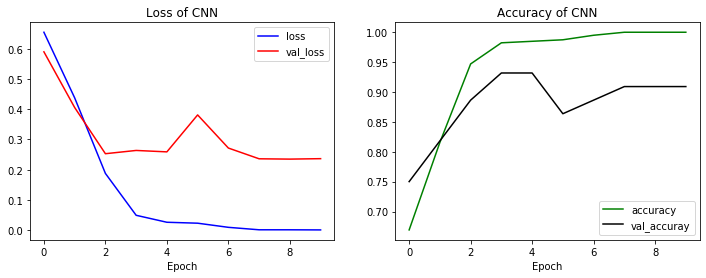

In [47]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('Loss of CNN')
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy of CNN')
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label='val_accuray')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [48]:
print(model2.evaluate(x_test, y_ts)[1])

4/4 [==============================] - 0s 5ms/step - loss: 0.3480 - accuracy: 0.8727
0.8727272748947144


#### Test set 분류 결과

In [35]:
p = pd.DataFrame(model2.predict(x_test), columns=['0', '1'])    
result = []

for row in p['0']:
    if row > 0.5:
        result.append('0')
    else:
        result.append('1')

p['prediction'] = result
p[:10]

,0,1,prediction
0,1.215771e-01,0.854602,1
1,6.182451e-07,0.999999,1
2,9.999647e-01,0.000039,0
3,1.209180e-04,0.999881,1
4,9.991783e-01,0.000869,0
5,2.846622e-02,0.973460,1
6,6.182451e-07,0.999999,1
7,4.597604e-04,0.999558,1
8,1.271367e-04,0.999861,1
9,9.663558e-01,0.033607,0


In [36]:
y_df = pd.DataFrame(y_test, columns=['genre'])

df_result = pd.concat([y_df, p['prediction']], axis=1)
df_result[:10]

,genre,prediction
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,0,1
6,1,1
7,1,1
8,1,1
9,0,0
